In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Principal Component Analysis:

https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained

*Steps Taken:*
<br> - Standardize the range of continuous initial variables
<br> - Compute the covariance matrix to identify correlations
<br> - Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
<br> - Create a feature vector to decide which principal components to keep
<br> - Recast the data along the principal components axes

In [2]:
def dataframe(df):
    z = pd.DataFrame(data = df)
    
    return z

<br><br> **Initialize data and clean data:**

In [3]:
df = pd.read_csv('data.csv', index_col = 0)

x = df['12M Return']

df1 = df.drop(columns=['Index', 'Price', '12M Return'])

In [122]:
#Z-score the values
z_score = StandardScaler().fit_transform(df1)

#Put into DataFrame
df_z_score = pd.DataFrame(z_score, columns = df1.columns, index = df1.index)

#Drop Na's on columns
df_z_score1 = df_z_score.dropna(axis=1)

In [123]:
df_z_score1.head(5)

,D12,E12,DE,b/m,tbl,AAA,BAA,DFY,DFR,lty,ntis,tms,Rfree,infl,ltr,corpr,svar,CRSP_SPvw,CRSP_SPvwx
1/05/1937,0.909462,0.180647,-1.175447,-0.226686,-1.002723,-0.890495,-0.674105,1.038942,-0.108610,-0.841329,0.834540,-0.828831,-0.881609,0.879355,0.011400,-0.052736,0.294007,-0.336585,-0.400902
1/06/1937,1.125156,0.361700,-1.244270,-0.163694,-1.018658,-0.907788,-0.644799,1.327216,0.502893,-0.830948,0.996339,-0.806266,-0.997815,-0.624211,-0.265477,0.004418,0.165880,-1.400095,-1.420243
1/07/1937,0.844753,0.180647,-1.106623,-0.326827,-1.044154,-0.918164,-0.651311,1.347807,-0.734672,-0.858629,0.775213,-0.836353,-0.997815,0.857875,0.342873,-0.057132,0.165880,1.978374,2.019483
1/08/1937,0.909462,0.339068,-0.934565,-0.256970,-1.040967,-0.921622,-0.648055,1.388989,0.619370,-0.827488,0.985553,-0.798744,-1.036550,-0.624211,-0.600849,-0.303333,-0.026310,-1.342608,-1.384941
1/09/1937,1.189865,0.723805,-0.796918,0.030531,-1.034593,-0.907788,-0.569904,1.800808,-0.159568,-0.834408,1.239038,-0.813788,-0.959080,0.857875,-0.019797,-0.118682,2.899253,-3.297167,-3.313306


<br> **Transpose & Create Co-variance Matrix:**

In [124]:
cov = np.cov(df_z_score1.T)

#Put into DataFrame
cov_max = pd.DataFrame(data = cov, columns = df_z_score1.columns, index = df_z_score1.columns )

#Display COV matrix
cov_max

,D12,E12,DE,b/m,tbl,AAA,BAA,DFY,DFR,lty,ntis,tms,Rfree,infl,ltr,corpr,svar,CRSP_SPvw,CRSP_SPvwx
D12,1.000997,0.795848,-0.387085,0.890240,0.101540,-0.024150,0.017185,0.252448,-0.010478,0.045624,0.303420,0.040897,0.089517,0.157788,-0.024297,-0.033716,-0.001626,-0.035562,-0.063433
E12,0.795848,1.000997,0.252050,0.831646,0.278191,0.111667,0.114467,0.059009,-0.073144,0.177426,0.254554,0.166966,0.266507,0.210711,-0.004234,-0.048947,-0.121071,-0.039803,-0.064061
DE,-0.387085,0.252050,1.000997,-0.156498,0.260240,0.207188,0.145609,-0.312755,-0.094904,0.195874,-0.098522,0.187483,0.261715,0.068249,0.031629,-0.021664,-0.180644,-0.003692,0.003871
b/m,0.890240,0.831646,-0.156498,1.000997,0.309998,0.180654,0.211816,0.263874,-0.010575,0.238643,0.311882,0.230649,0.295891,0.265865,-0.015125,-0.023435,-0.061849,-0.036583,-0.061232
tbl,0.101540,0.278191,0.260240,0.309998,1.000997,0.898028,0.864681,0.121305,-0.031851,0.913656,0.049061,0.896887,0.990328,0.268300,0.044034,0.030412,-0.098274,-0.023631,-0.025145
AAA,-0.024150,0.111667,0.207188,0.180654,0.898028,1.000997,0.989521,0.297691,-0.016413,0.990885,-0.046859,0.990319,0.892552,0.202393,0.097501,0.100011,-0.015228,-0.011337,-0.009165
BAA,0.017185,0.114467,0.145609,0.211816,0.864681,0.989521,1.000997,0.438577,-0.007967,0.973197,-0.091828,0.974251,0.860048,0.183950,0.109454,0.118587,0.041340,-0.010453,-0.009325
DFY,0.252448,0.059009,-0.312755,0.263874,0.121305,0.297691,0.438577,1.000997,0.047334,0.254671,-0.301694,0.264700,0.124611,-0.041761,0.111646,0.154453,0.352072,0.001394,-0.004403
DFR,-0.010478,-0.073144,-0.094904,-0.010575,-0.031851,-0.016413,-0.007967,0.047334,1.000997,-0.001452,0.009564,0.002500,-0.042008,0.014924,-0.467322,0.077672,-0.190041,0.225903,0.226088
lty,0.045624,0.177426,0.195874,0.238643,0.913656,0.990885,0.973197,0.254671,-0.001452,1.000997,0.011455,1.000132,0.904680,0.219439,0.043056,0.047666,-0.054382,-0.011764,-0.011397


<br> **Compute Eigenvalue and Eigenvector:**

In [125]:
eigen_value, eigenvector = np.linalg.eig(cov_max)

In [126]:
#Use function 'dataframe' to make into dataframe
eigen_values = dataframe(eigen_value)

#Create column_name
eigen_values.columns = ['eigenvalue']

#Round the values to 5 decimal points using lambda function
eigen_values["eigenvalue"] = eigen_values["eigenvalue"].apply(lambda x: round(x, 5))

<br> **Eigenvalues**

In [151]:
eigen_values.head()

,eigenvalue
0,6.06111
1,2.86614
2,2.29476
3,2.11772
4,1.64289


**Eigenvectors (or loadings)**

In [172]:
eigenvectors = dataframe(eigenvector)

#Iteratively renaming the columns with PC and then 'x' which references which PC it is:
column_names = ['PC{}'.format(i) for i in range(0, 19)]

eigenvectors.columns = column_names
eigenvectors.index = df_z_score1.columns
eigenvectors

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
D12,0.073596,-0.533949,-0.119509,0.177074,0.078725,0.017170,0.063523,-0.007689,-0.099338,-0.192371,0.154928,-0.379081,-0.018385,0.062149,-0.009071,0.659086,4.291062e-04,-1.350700e-12,2.212017e-13
E12,0.135215,-0.459261,-0.120908,0.023873,-0.216302,0.335255,0.056302,-0.204369,0.108910,0.002092,0.138223,-0.349881,-0.014889,0.052006,-0.015306,-0.628442,-4.077942e-04,1.296157e-12,-2.199949e-13
DE,0.087761,0.153675,0.007124,-0.246291,-0.454000,0.484130,-0.015535,-0.298027,0.324255,0.308902,-0.039098,0.069897,0.006550,-0.027189,0.006329,0.413056,2.615906e-04,-8.613658e-13,1.459748e-13
b/m,0.158887,-0.498809,-0.123733,0.118691,0.005521,0.079811,0.002509,-0.047619,-0.031436,-0.029233,-0.064170,0.824402,-0.000392,-0.047613,0.002385,0.000785,-3.082892e-06,-9.310084e-15,2.871704e-15
tbl,0.385572,0.027403,0.000518,-0.083643,-0.065777,-0.035835,0.039054,0.006862,0.000874,-0.265044,-0.477147,-0.077554,0.708341,0.172140,-0.033056,0.000216,1.266097e-05,1.504328e-14,-1.196447e-14
AAA,0.391642,0.127937,0.031736,-0.006312,0.048114,-0.052833,0.040142,0.012100,-0.008688,0.058003,0.236741,0.063086,-0.158101,0.519631,-0.010220,0.001972,-9.784938e-06,-5.764334e-01,4.131344e-01
BAA,0.388131,0.114583,0.037600,0.053904,0.119783,-0.013885,0.029956,0.007549,-0.015421,0.152213,0.165796,0.038089,-0.142398,0.469611,-0.009182,0.001735,-9.246075e-06,6.122466e-01,-4.388020e-01
DFY,0.122662,-0.037122,0.048823,0.378434,0.470995,0.226745,-0.049562,-0.024299,-0.045790,0.617187,-0.361050,-0.134735,0.040814,-0.124093,0.002783,-0.000768,-1.975911e-07,-9.682182e-02,6.939298e-02
DFR,-0.013139,0.018596,-0.250135,-0.202243,0.394205,-0.219208,-0.281771,-0.647213,0.214447,-0.098537,0.011252,-0.006681,-0.001698,0.005947,-0.000335,-0.000038,3.719886e-01,5.840465e-10,-8.487433e-11
lty,0.395716,0.082018,0.016687,-0.043371,0.043109,-0.069336,0.068155,0.014159,-0.016388,0.017870,0.284196,-0.014295,0.077572,-0.442826,0.010353,-0.001028,5.256624e-06,-3.909915e-01,-5.837561e-01


<br> **Calculate the Principal Component**

Calc the dot product of the transposed eigen-vector with transposed version of the z-scored data. Transpose all of that:

In [141]:
pca = PCA()

pc = pca.fit_transform(df_z_score1)

<br> **Principal Components Series:**

In [154]:
pcA = dataframe(pc)
pcA.columns = df_z_score1.columns
pcA.index = df_z_score1.index

pcA.head()

,D12,E12,DE,b/m,tbl,AAA,BAA,DFY,DFR,lty,ntis,tms,Rfree,infl,ltr,corpr,svar,CRSP_SPvw,CRSP_SPvwx
1/05/1937,-1.796656,1.541064,0.343154,0.802113,0.720482,-0.596770,0.659185,0.789377,0.046467,-0.812401,0.125225,0.812609,-0.070654,-0.028153,0.034108,-0.000654,4.690844e-07,-1.363686e-15,6.248758e-16
1/06/1937,-1.919258,1.946129,1.399924,0.878827,1.090225,-0.995177,-0.916063,-0.143042,-0.320672,-0.951543,0.178795,0.880301,-0.019899,-0.017397,-0.006133,-0.000097,1.176704e-05,-1.019501e-15,5.971369e-16
1/07/1937,-1.877868,0.703352,-2.367668,1.304341,0.818199,0.221306,2.146037,0.127911,0.468902,-1.016719,0.156564,0.866425,-0.007420,-0.043537,-0.043477,-0.015103,-5.104090e-06,4.592603e-16,-1.096052e-16
1/08/1937,-1.965983,1.808430,1.367106,0.365103,1.195530,-0.768592,-0.987785,-0.197515,-0.306357,-1.193540,0.235241,0.855516,-0.011975,-0.037459,0.013543,-0.000387,1.332556e-05,-1.294565e-16,1.065910e-15
1/09/1937,-1.522076,3.004708,4.678638,1.646409,0.844150,-0.704914,-0.502716,1.213141,1.480828,-0.980804,0.119892,0.908556,-0.003491,-0.091122,-0.004388,-0.000801,2.233100e-05,2.568336e-15,2.581319e-15


<br> **These are just the diagonal eigenvalues that have been divided by the sum of all of the eigenvalues**

<AxesSubplot:>

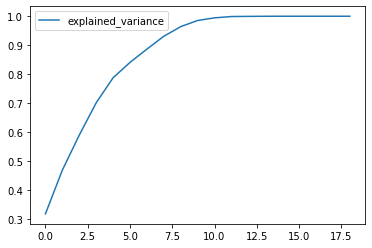

In [174]:
beta = pca.explained_variance_ratio_

betas = pd.DataFrame(beta)
betas.columns = ['explained_variance']

betas["explained_variance"] = betas["explained_variance"].apply(lambda x: round(x, 4))
betas.cumsum().plot()